# Device Enumeration and Device Configuration

In [1]:
# these four imports will provide most of the functionality required in
# to start working with basler cameras
# pypylon
import pypylon.pylon as py

# plotting for graphs and display of image
import matplotlib.pyplot as plt

# linear algebra and basic math on image matrices
import numpy as np

# OpenCV for image processing functions
import cv2

import inspect

In [2]:
# get instance of the pylon TransportLayerFactory
tlf = py.TlFactory.GetInstance()

In [3]:
# all pypylon objects are instances of SWIG wrappers around the underlying pylon c++ types
tlf

<pypylon.pylon.TlFactory; proxy of <Swig Object of type 'Pylon::CTlFactory *' at 0x000001E1F29E82A0> >

In [4]:
devices = tlf.EnumerateDevices()

In [5]:
# list of pylon Device
len(devices)

1

In [6]:
devices[0]

<pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x000001E1EE43DB60> >

In [7]:
for device in devices:
    print(device.GetModelName(), device.GetSerialNumber())

acA3088-57um 24261792


In [8]:
# the active camera will be an InstantCamera based on a device
# created with the corresponding DeviceInfo
# this can be from a list of previously enumerated
cam = py.InstantCamera(tlf.CreateDevice(devices[0]))

In [9]:
cam

<pypylon.pylon.InstantCamera; proxy of <Swig Object of type 'Pylon::CInstantCamera *' at 0x000001E1EFD43210> >

In [10]:
# or with the helper method to get the FirstDevice from an enumeration
cam = py.InstantCamera(tlf.CreateFirstDevice())

In [11]:
# the features of the device are only accessable after Opening the device
cam.Open()

In [12]:
cam.GainAuto.Value

'Off'

In [13]:
cam.Gain.Value = 0

In [14]:
cam.Gain.Value

0.0

In [18]:
cam.ExposureTime.Value

8.0

In [40]:
cam.Close()

In [43]:
cam.DeviceReset()

In [20]:
%pwd

'd:\\OneDrive - University of Arizona\\research\\github_repositories\\basler_camera_control_script\\notebooks'

# Features and their available attributes and functions

pylon / genicam features are of the types:

* Float
* Integer
* Bool
* Command
* String

If there are multiple instances of a features e.g. TriggerSource for each possible Trigger on a device e.g. FrameStart/LineStart/FrameBurst ....:
* Selectors are used to first select the instance e.g. FrameStart and then write to the feature


In [11]:
# Float
# the node
cam.Gain

<pypylon.genicam.IFloat; proxy of <Swig Object of type 'GENAPI_NAMESPACE::IFloat *' at 0x00000185A9B00FC0> >

In [12]:
# Float
# the value
cam.Gain.GetValue()

0.0

In [13]:
# abbrev get value
cam.Gain.Value

0.0

In [16]:
# set the value
cam.Gain.SetValue(0)

In [15]:
# abbrev set value
cam.Gain = 12.1

In [17]:
# the value has been updated
cam.Gain.Value

0.0

In [14]:
cam.Gain = 20

C:\Users\Shawn\AppData\Local\Temp\ipykernel_10596\493777350.py:1: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.Gain.Value = 20
  cam.Gain = 20


In [18]:
# Enumeration ... all values:
cam.TriggerSelector.Symbolics

('FrameBurstStart', 'FrameStart')

In [19]:
# set the value
cam.TriggerSelector = "FrameStart"

C:\Users\Shawn\AppData\Local\Temp\ipykernel_10596\2923512820.py:2: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.TriggerSelector.Value = FrameStart
  cam.TriggerSelector = "FrameStart"


In [20]:
# selector handling:
# first set selector than the dependent value:
cam.TriggerSelector = "FrameStart"
cam.TriggerSource = "Line1"

C:\Users\Shawn\AppData\Local\Temp\ipykernel_10596\1571711424.py:3: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.TriggerSelector.Value = FrameStart
  cam.TriggerSelector = "FrameStart"
C:\Users\Shawn\AppData\Local\Temp\ipykernel_10596\1571711424.py:4: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.TriggerSource.Value = Line1
  cam.TriggerSource = "Line1"


In [21]:
# reset to power on defaults
cam.UserSetSelector = cam.UserSetDefault.Value
cam.UserSetLoad.Execute()

C:\Users\Shawn\AppData\Local\Temp\ipykernel_10596\3936330742.py:2: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.UserSetSelector.Value = Default
  cam.UserSetSelector = cam.UserSetDefault.Value


In [22]:
cam.PixelFormat.Symbolics

('Mono8', 'Mono12', 'Mono12p')

In [23]:
cam.PixelFormat = "Mono8"
# like above, alternative is the long form
cam.PixelFormat.SetValue("Mono8")

C:\Users\Shawn\AppData\Local\Temp\ipykernel_10596\3181819079.py:1: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.PixelFormat.Value = Mono8
  cam.PixelFormat = "Mono8"


In [24]:
# grab one image with a timeout of 1s
# returns a GrabResult, which is the image plus metadata
res = cam.GrabOne(1000)

In [25]:
# the raw memory of the image
res.GetBuffer()[:100]

bytearray(b'\x19\x1c\x1c\x1c\x1b\x1b\x19\x1b\x1b\x1a\x1b\x1b\x1d\x19\x1c\x1b\x1b\x1c\x1b\x1b\x1c\x1b\x1c\x1c\x1b\x1c\x1c\x1d\x1c\x1b\x1d\x1d\x1b\x1d\x1b\x1b\x1c\x1c\x1c\x1c\x1e\x1e\x1d\x1d\x1b\x1c\x1d\x1d\x1e\x1e\x1d\x1d\x1e\x1d\x1c\x1c\x1c\x1d\x1e\x1d\x1d\x1c\x1d\x1d\x1d\x1d\x1e\x1d\x1e\x1e\x1e\x1f\x1d\x1e\x1e\x1f\x1e\x1d\x1d\x1d\x1e\x1e\x1e\x1f\x1d\x1e\x1d\x1d\x1e\x1e\x1e\x1e\x1e\x1f\x1e\x1f\x1f\x1d\x1e\x1e')

# automatic conversion to ndarray with the Array call

In [26]:
# full method call
img = res.GetArray()
# abbrev
img = res.Array

In [27]:
img.shape

(2064, 3088)

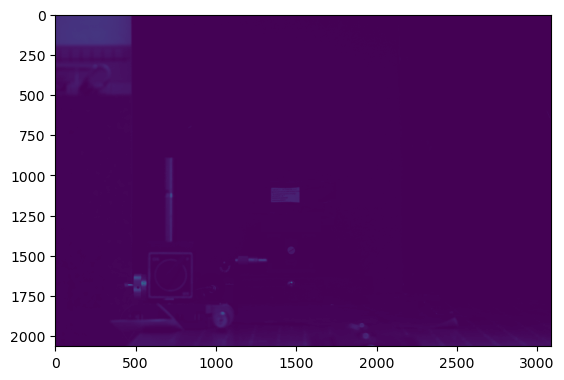

In [28]:
plt.imshow(img)
plt.show()

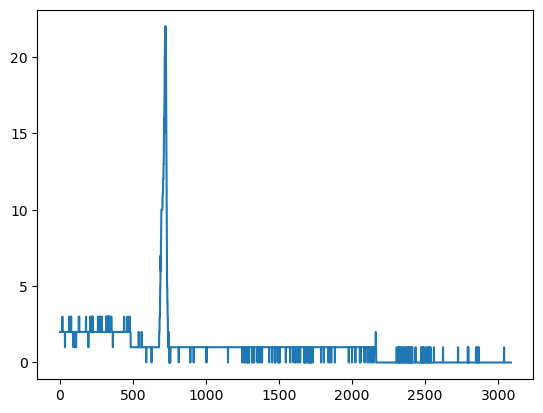

In [29]:
plt.plot(img[1000, :])

In [32]:
cam.Close()